In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


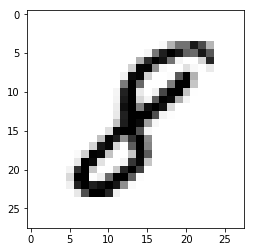

In [3]:
import matplotlib.pyplot as plt

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [8]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 39s 649us/step - loss: 0.2185 - accuracy: 0.9345
Epoch 2/10
60000/60000 [==============================] - 38s 628us/step - loss: 0.0863 - accuracy: 0.9732
Epoch 3/10
60000/60000 [==============================] - 37s 624us/step - loss: 0.0599 - accuracy: 0.9813
Epoch 4/10
60000/60000 [==============================] - 39s 650us/step - loss: 0.0453 - accuracy: 0.9857
Epoch 5/10
60000/60000 [==============================] - 38s 636us/step - loss: 0.0358 - accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 38s 635us/step - loss: 0.0318 - accuracy: 0.9898
Epoch 7/10
60000/60000 [==============================] - 38s 632us/step - loss: 0.0246 - accuracy: 0.9917
Epoch 8/10
60000/60000 [==============================] - 39s 649us/step - loss: 0.0215 - accuracy: 0.9923
Epoch 9/10
60000/60000 [==============================] - 38s 635us/step - loss: 0.0217 - accuracy: 0.9929
Epoch 10/10
60000/60000 [===========

In [10]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 212us/step


[0.06296912007422543, 0.9850999712944031]